In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12

In [18]:
# generate data for Venn diagrams 
data = {}
phenotypes = ['DTF1', 'RL', 'Diameter', 'FT10']
species = 'Ara'
for phenotype in phenotypes:
    # load data
    lin=f'{pheno}_linearregression_feature_importances.csv'
    xgb=f'{pheno}_xgboost_feature_importances.csv'
    rf=f'{pheno}_RF_feature_importances.csv'
    gwas_data=f'p_values_{pheno}.csv'
    df_lin = pd.read_csv(lin)
    df_lin=df_lin.drop(df_lin[df_lin.coefficients_0 ==0].index)
    df_xgb = pd.read_csv(xgb)
    df_xgb = df_xgb.drop(df_xgb[df_xgb.feat_importance_standard ==0].index)
    df_rf = pd.read_csv(rf)
    df_rf = df_rf.drop(df_rf[df_rf.feat_importance_standard ==0].index)
    df_gwas = pd.read_csv(gwas_data)
    df_gwas = df_gwas.nsmallest(1000, 'p_value')
    snp_ids=[]
    for i in range(len(df_gwas['CHR'])):
        snp_ids.append(str(df_gwas['POS'][i])+"_"+str(df_gwas['CHR'][i]))
    
    # compute all intersections
    set_lin = set(df_lin['snp_ids_0'])
    set_xgb = set(df_xgb['snp_ids_standard'])
    set_rf = set(df_rf['snp_ids_standard'])
    set_gwas100 = set(snp_ids)

    int_all = set.intersection(set_lin, set_xgb, set_rf)
    int_lin_xgb = set.intersection(set_lin, set_xgb)
    int_lin_rf = set.intersection(set_lin, set_rf)
    int_rf_xgb = set.intersection(set_rf, set_xgb)

    top100_all = set.intersection(int_all,  set_gwas100)
    top100_lin_xgb = set.intersection(int_lin_xgb,  set_gwas100)
    top100_lin_rf = set.intersection(int_lin_rf,  set_gwas100)
    top100_rf_xgb = set.intersection(int_rf_xgb,  set_gwas100)
    top100_lin = set.intersection(set_lin, set_gwas100)
    top100_xgb = set.intersection(set_xgb, set_gwas100)
    top100_rf = set.intersection(set_rf, set_gwas100)
    
    # generate list with data in right order for Venn diagram
    part = [0]*7
    part_top = [0]*7
    part[6] = len(int_all)
    part_top[6] = len(top100_all)
    part[5] = len(int_rf_xgb)-part[6]
    part_top[5] = len(top100_rf_xgb)-part_top[6]
    part[4] = len(int_lin_rf)-part[6]
    part_top[4] = len(top100_lin_rf)-part_top[6]
    part[3] = len(set_rf)-part[4]-part[5]-part[6]
    part_top[3] = len(top100_rf)-part_top[4]-part_top[5]-part_top[6]
    part[2] = len(int_lin_xgb)-part[6]
    part_top[2] = len(top100_lin_xgb)-part_top[6]
    part[1] = len(set_xgb)-part[2]-part[6]-part[5]
    part_top[1] = len(top100_xgb)-part_top[2]-part_top[6]-part_top[5]
    part[0] = len(set_lin)-part[2]-part[6]-part[4]
    part_top[0] = len(top100_lin)-part_top[2]-part_top[6]-part_top[4]

    numbers = []
    for i in range(7):
        numbers.append(str(part[i])+'('+str(part_top[i])+')')
        
    data[f'{species}_{pheno}'] = numbers

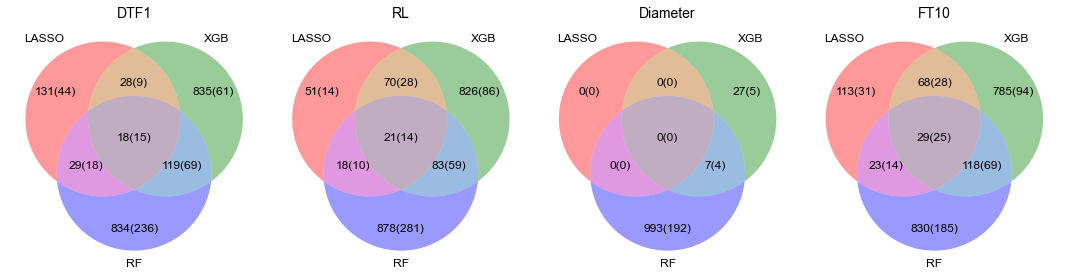

In [60]:
#create plot
cm=1
titles = [
    'DTF1',
    'RL', 
    'Diameter', 
    'FT10'
]

names = ['Ara_DTF1', 'Ara_RL', 'Ara_Diameter', 'Ara_FT10']

fig = plt.figure(figsize=(15, 5))

for i in range(len(names)):
        ax = fig.add_subplot(1, 4, i+1)
        v = venn3_unweighted(subsets=data[names[i]], set_labels=('LASSO', 'XGB', 'RF'), ax=ax)
        for text in v.set_labels:
           text.set_fontsize(12)
        for text in v.subset_labels:
           text.set_fontsize(12)
        ax.set_title(titles[i], fontsize=14)
plt.subplots_adjust(hspace=0.1)
#fig.suptitle('Feature importances compared with GWAS results', fontsize=14)
fig.tight_layout()
plt.savefig('Venn_diagram.svg', bbox_inches='tight', dpi=300)
plt.savefig('Venn_diagram.jpg', bbox_inches='tight', dpi=300)
plt.savefig('Venn_diagram.pdf', bbox_inches='tight', dpi=300)
plt.show()